In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from scipy.stats import pearsonr,spearmanr

In [2]:
!gdown 1nKb67meAvoFNRG_VueNXh_-k_2F9Oisc
!gdown 144wrGLTgzCm8FZdl0rasbjsm6dKG_yvB
!gdown 1xgzPmbSCU8KM6Lt1rJXLFADHxgsy9u4t
!gdown 1F8EPu3t_GbXX3BQ3OQSXsoieeSsCR5ly
!gdown 1CmZ0j83nKoNeOqbGgZHSa92-kdXHkXIP

Downloading...
From: https://drive.google.com/uc?id=1nKb67meAvoFNRG_VueNXh_-k_2F9Oisc
To: /content/Customers.csv
100% 31.8k/31.8k [00:00<00:00, 27.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=144wrGLTgzCm8FZdl0rasbjsm6dKG_yvB
To: /content/Discount_Coupon.csv
100% 4.92k/4.92k [00:00<00:00, 14.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xgzPmbSCU8KM6Lt1rJXLFADHxgsy9u4t
To: /content/Marketing_Spend.csv
100% 8.67k/8.67k [00:00<00:00, 25.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1F8EPu3t_GbXX3BQ3OQSXsoieeSsCR5ly
To: /content/Online_Sales.csv
100% 5.24M/5.24M [00:00<00:00, 215MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CmZ0j83nKoNeOqbGgZHSa92-kdXHkXIP
To: /content/Tax_amount.csv
100% 297/297 [00:00<00:00, 1.06MB/s]


In [3]:
cust_data = pd.read_csv("Customers.csv")
discount_coup = pd.read_csv("Discount_Coupon.csv")
mrkt_spend = pd.read_csv("Marketing_Spend.csv")
online_sale = pd.read_csv("Online_Sales.csv")
tax_amt = pd.read_csv("Tax_amount.csv")

## Business objective


The e-commerce company is expecting below analysis using the data

1. **Calculate Invoice amount or sale_amount or revenue for each transaction and item level**
   - Invoice Value = ((Quantity * Avg_price) * (1 - Discount_pct) * (1 + GST)) + Delivery_Charges

2. **Perform Detailed exploratory analysis**
   - Understanding how many customers acquired every month
   - Understand the retention of customers on a month-on-month basis
   - How the revenues from existing/new customers on a month-on-month basis
   - How the discounts play a role in the revenues
   - Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day, etc.
   - Understand the trends/seasonality of sales by category, location, month, etc.
   - How the number of orders varies and sales with different days
   - Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month
   - How marketing spend is impacting on revenue
   - Which product appeared in the transactions
   - Which product was purchased mostly based on the quantity

3. **Performing Customer Segmentation**
   - Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define a strategy on the same.

4. **Perform cohort analysis by defining below cohorts**
   - Customers who started in each month and understand their behavior
   - Which Month cohort has maximum retention?


In [4]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


From the above output we can see that customerID is in integer format since it does not make sense to perform any interger specifc operations on this field we'll convert it into string

There are no nulls in this table

In [5]:
#converting customer id to string
cust_data['CustomerID']=cust_data['CustomerID'].astype(str)

In [6]:
cust_data.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [7]:
print(f"Total number of unique customers: {cust_data.CustomerID.nunique()}")
print(f"Total number of unique locations: {cust_data.Location.nunique()}")
print(f"Total number of unique Tenure months: {cust_data.Tenure_Months.nunique()}")

Total number of unique customers: 1468
Total number of unique locations: 5
Total number of unique Tenure months: 49


In [8]:
discount_coup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


There are no nulls in this table

In [9]:
discount_coup.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [10]:
discount_coup['Discount_pct']=discount_coup['Discount_pct']/100

In [11]:
discount_coup.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,0.1
1,Feb,Apparel,SALE20,0.2
2,Mar,Apparel,SALE30,0.3
3,Jan,Nest-USA,ELEC10,0.1
4,Feb,Nest-USA,ELEC20,0.2


In [12]:
discount_coup.Month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [13]:
print(f"Total number of unique product categories: {discount_coup.Product_Category.nunique()}")
print(f"Total number of unique coupon code: {discount_coup.Coupon_Code.nunique()}")

Total number of unique product categories: 17
Total number of unique coupon code: 48


In [14]:
mrkt_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


We can see that the date is recognized as a string so we'll convert that to date format and there are no nulls in this table

In [15]:
mrkt_spend.Date = pd.to_datetime(mrkt_spend["Date"])

In [16]:
mrkt_spend.head()

,Date,Offline_Spend,Online_Spend
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [17]:
online_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


There are no nulls in this table

In [18]:
online_sale.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


Based on the above output we'll perform below operations:

* Convert customer id field to string
* Convert transaction id field to string
* Convert transaction_date field to date format
* We'll extract month from the transaction date field

In [19]:
online_sale['CustomerID']=online_sale['CustomerID'].astype(str)
online_sale['Transaction_ID']=online_sale['Transaction_ID'].astype(str)
online_sale['Transaction_Date'] = pd.to_datetime(online_sale['Transaction_Date'], format='%m/%d/%Y')
online_sale['Month'] = online_sale['Transaction_Date'].dt.strftime('%b')

In [20]:
online_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  object        
 1   Transaction_ID       52924 non-null  object        
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 4.4+ MB


In [21]:
tax_amt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_Category  20 non-null     object
 1   GST               20 non-null     object
dtypes: object(2)
memory usage: 452.0+ bytes


There are no nulls in this table

In [22]:
tax_amt.head()

,Product_Category,GST
0,Nest-USA,10%
1,Office,10%
2,Apparel,18%
3,Bags,18%
4,Drinkware,18%


We'll extarct the digits from the gst column and divide it by 100 to get the percentage value

In [23]:
tax_amt['GST']=tax_amt['GST'].str.extract('(\d+)').astype(int)/100

In [24]:
tax_amt.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


## 1. **Calculate Invoice amount or sale_amount or revenue for each transaction and item level**
   - Invoice Value = ((Quantity * Avg_price) * (1 - Discount_pct) * (1 + GST)) + Delivery_Charges

In [25]:
online_sale.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan


In [26]:
discount_coup.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,0.1
1,Feb,Apparel,SALE20,0.2
2,Mar,Apparel,SALE30,0.3
3,Jan,Nest-USA,ELEC10,0.1
4,Feb,Nest-USA,ELEC20,0.2


Merging the dataframes

In [27]:
result = pd.merge(online_sale, discount_coup, on=['Month', 'Product_Category'], how='left')
merged_df = pd.merge(result,tax_amt,on=['Product_Category'], how = 'left')

Filling null values

In [28]:
merged_df['Coupon_Code'].fillna('Not Available',inplace=True)
merged_df['Discount_pct'].fillna(0, inplace=True)

<ipython-input-28-22bdc889d53e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Coupon_Code'].fillna('Not Available',inplace=True)
<ipython-input-28-22bdc889d53e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

To compute the invoice value we first check whether the cupon status is used which states that whether the customer has used the discount coupon or not based on that we calculate the invoice amount

In [29]:
merged_df['Invoice'] = np.where(
    merged_df['Coupon_Status'] == 'Used',
    ((merged_df['Quantity'] * merged_df['Avg_Price']) * (1 - merged_df['Discount_pct']) * (1 + merged_df['GST'])) + merged_df['Delivery_Charges'],
    ((merged_df['Quantity'] * merged_df['Avg_Price']) * (1 + merged_df['GST'])) + merged_df['Delivery_Charges']
)

## 2. **Perform Detailed exploratory analysis**
   - Understanding how many customers acquired every month
   - Understand the retention of customers on a month-on-month basis
   - How the revenues from existing/new customers on a month-on-month basis
   - How the discounts play a role in the revenues
   - Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day, etc.
   - Understand the trends/seasonality of sales by category, location, month, etc.
   - How the number of orders varies and sales with different days
   - Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month
   - How marketing spend is impacting on revenue
   - Which product appeared in the transactions
   - Which product was purchased mostly based on the quantity

In [30]:
merged_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,0.1,0.10,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,0.1,0.10,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,0.1,0.10,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,0.1,0.18,109.9270
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,0.1,0.18,24.0230


In [60]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  object        
 1   Transaction_ID       52924 non-null  object        
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
 11  Coupon_Code          52924 non-null  object        
 12  Discount_pct         52924 non-null  float64       
 13  GST                  52924 non-

In [31]:
merged_df["Invoice"].describe()

,Invoice
count,52924.000000
mean,101.983198
std,172.365729
min,4.603500
25%,20.160000
50%,45.636200
75%,137.400000
max,8979.275000


based on the above we can conclude the following:
- The average invoice value is 101$
- The maximum invoice value is 8979.27 which is very high seems to be an outlier case here.

### Understanding how many customers acquired every month

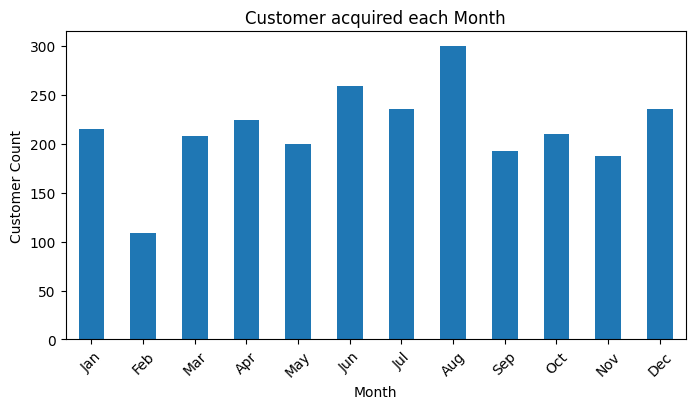

In [32]:
merged_df['Month2'] = pd.to_datetime(merged_df['Month'], format='%b')
customer_count_by_month = merged_df.groupby('Month2')['CustomerID'].nunique()

plt.figure(figsize=(8, 4))
customer_count_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Customer Count')
plt.title('Customer acquired each Month')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

We can see that more number of customers were acquired in the month of Aug roughly around 300 customers, and least number of customers were acquired in the month of Feb.

### Understand the retention of customers on a month-on-month basis

In [33]:
month_dict = {}
#filtering out unique customers for a given month
for i in merged_df['Month'].unique():
   month_dict[i] = merged_df[merged_df['Month']==i]['CustomerID'].unique().tolist()

In [34]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
retention = [0]
for i in range(11):
  set1 = set(month_dict[months[i]]) #getting list of customer for a given month
  set2 = set(month_dict[months[i+1]]) #getting list of customers for the next month
  common_items = len(set1.intersection(set2)) #counting customers that were present in the current as well as next month
  retention.append(common_items)

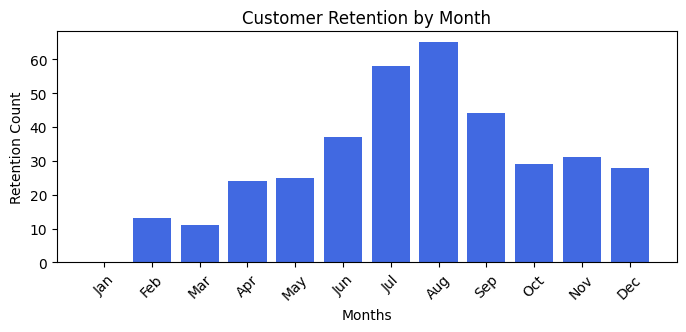

In [35]:
plt.figure(figsize=(8, 3))
plt.bar(months, retention, color='royalblue')
plt.xlabel('Months')
plt.ylabel('Retention Count')
plt.title('Customer Retention by Month')
plt.xticks(rotation=45)
plt.show()

We can see that during the month of July and August the retention of the customers was the highest.

### How the revenues from existing/new customers on a month-on-month basis

In [36]:
temp = [] #Variable to store each unique customer who has visited the store
new_cust_each_month = {}
existing_cust_each_month = {}

no_of_new_cust_each_month = {}
no_of_existing_cust_each_month = {}

for i in merged_df['Month'].unique():
   x = merged_df[merged_df['Month']==i]['CustomerID'].unique().tolist()
   new_cust = [value for value in x if value not in temp]
   existing_cust = [value for value in x if value in temp]
   temp.extend(x)
   temp = list(set(temp))
   new_cust_each_month[i] = new_cust
   existing_cust_each_month[i] = existing_cust
   no_of_new_cust_each_month[i] = len(new_cust)
   no_of_existing_cust_each_month[i] = len(existing_cust)

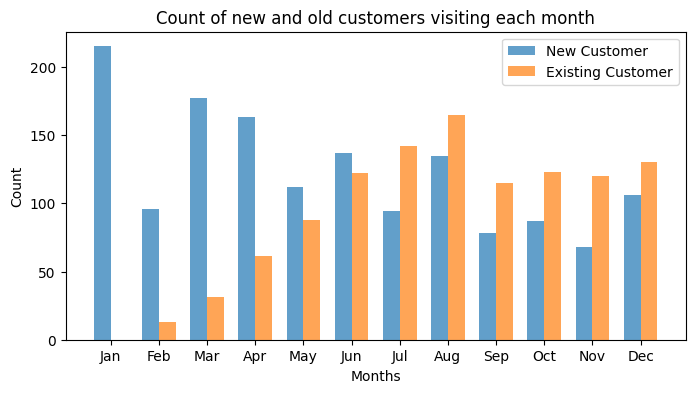

In [37]:
months = list(no_of_new_cust_each_month.keys())
new_cust = list(no_of_new_cust_each_month.values())
existing_cust = list(no_of_existing_cust_each_month.values())

plt.figure(figsize=(8, 4))
bar_width = 0.35
bar_positions = range(len(months))

plt.bar(bar_positions, new_cust, width=bar_width, label='New Customer', alpha=0.7)
plt.bar([pos + bar_width for pos in bar_positions], existing_cust, width=bar_width, label='Existing Customer', alpha=0.7)

plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Count of new and old customers visiting each month')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], months)
plt.legend()
plt.show()

Till June the company saw huge inflow of new customers and after June it was the exsiting customers had a high inflow to the store

In [38]:
new_cust_each_month_revenue = {}
existing_cust_each_month_revenue = {}

for month, ids in new_cust_each_month.items():
    new_cust_each_month_revenue[month] = merged_df[(merged_df['Month'] == month) & (merged_df['CustomerID'].isin(ids))]['Invoice'].sum()

for month, ids in existing_cust_each_month.items():
    existing_cust_each_month_revenue[month] = merged_df[(merged_df['Month'] == month) & (merged_df['CustomerID'].isin(ids))]['Invoice'].sum()

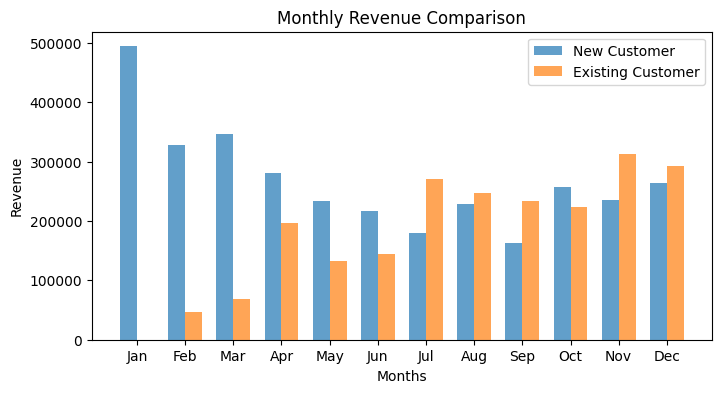

In [39]:
months = list(existing_cust_each_month_revenue.keys())
new_cust = list(new_cust_each_month_revenue.values())
existing_cust = list(existing_cust_each_month_revenue.values())

plt.figure(figsize=(8, 4))
bar_width = 0.35
bar_positions = range(len(months))

plt.bar(bar_positions, new_cust, width=bar_width, label='New Customer', alpha=0.7)
plt.bar([pos + bar_width for pos in bar_positions], existing_cust, width=bar_width, label='Existing Customer', alpha=0.7)

plt.xlabel('Months')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Comparison')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], months)
plt.legend()
plt.show()

Till June new customers contributed more to the revenue and after june Existing customers were the highest contributers to the revenue with an exception case that happened in october.

### How the discounts play a role in the revenues

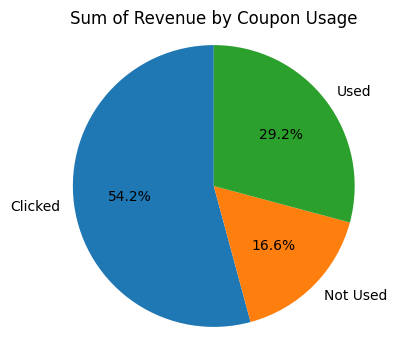

In [40]:
grouped = merged_df.groupby('Coupon_Status')['Invoice'].sum()

# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('Sum of Revenue by Coupon Usage')

plt.show()

Clicked coupon status contributes almost 50% to the overall revenue

### Which product was purchased mostly based on the quantity

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'GGOEGGOA017399'),
  Text(1, 0, 'GGOEGDHC018299'),
  Text(2, 0, 'GGOEGBMJ013399'),
  Text(3, 0, 'GGOEGOLC014299'),
  Text(4, 0, 'GGOEGFKQ020399'),
  Text(5, 0, 'GGOEGFSR022099'),
  Text(6, 0, 'GGOENEBQ078999'),
  Text(7, 0, 'GGOEGFYQ016599'),
  Text(8, 0, 'GGOEGOAQ012899'),
  Text(9, 0, 'GGOENEBJ079499')])

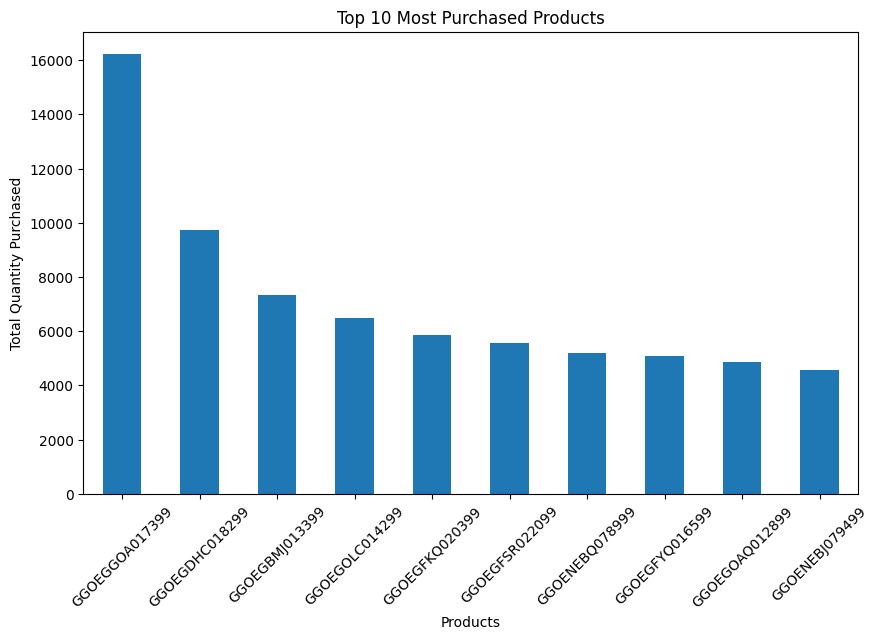

In [41]:
category_quantity = merged_df.groupby('Product_SKU')['Quantity'].sum()

# Find the category with the highest total quantity
top_10_categories = category_quantity.sort_values(ascending=False).head(10)

# Create a bar chart for the top 10 products
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar')
plt.xlabel('Products')
plt.ylabel('Total Quantity Purchased')
plt.title('Top 10 Most Purchased Products')
plt.xticks(rotation=45)

In [42]:
top10 = top_10_categories.reset_index()
filtered_df = merged_df[merged_df['Product_SKU'].isin(top10['Product_SKU'])]

# Group by 'product_id' and calculate summary statistics
summary_stats = filtered_df.groupby('Product_SKU').agg({
    'Product_Description': 'first',
    'Product_Category': 'first'  ,
     'Quantity': 'sum',
    'Invoice': 'sum'
}).reset_index()
summary_stats.columns = ['Product ID', 'Product Description', 'Product Category','Quantity','Revenue']

# Display the summary statistics DataFrame
summary_stats

,Product ID,Product Description,Product Category,Quantity,Revenue
0,GGOEGBMJ013399,Sport Bag,Bags,7321,42068.25962
1,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,9728,37418.94532
2,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,5847,24533.63450
3,GGOEGFSR022099,Google Kick Ball,Lifestyle,5549,15676.89884
4,GGOEGFYQ016599,Foam Can and Bottle Cooler,Drinkware,5098,11559.08054
5,GGOEGGOA017399,Maze Pen,Office,16234,19786.07210
6,GGOEGOAQ012899,Ballpoint LED Light Pen,Office,4861,15697.98510
7,GGOEGOLC014299,Google Metallic Notebook Set,Office,6496,41481.37750
8,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,4570,731870.69120
9,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,5206,671620.06650


Analyze key performance indicators (KPIs) such as revenue, order count, average order value, customer count (existing and new),
and quantity, sorted by category, month, week, and day. Simplify this as:

- Top 5 categories by revenue and quantity.
- Top 5 revenue days.
- Top 5 revenue weeks.
- Top 2 revenue months."

In [43]:
merged_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice,Month2
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,0.1,0.10,158.6729,1900-01-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,0.1,0.10,158.6729,1900-01-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,0.1,0.10,8.5295,1900-01-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,0.1,0.18,109.9270,1900-01-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,0.1,0.18,24.0230,1900-01-01


###top 5 categories by revenue

In [44]:
top_categories_Invoice = merged_df.groupby('Product_Category').agg({'Invoice': 'sum', 'Quantity': 'sum'}).nlargest(5, 'Invoice')

top_categories_Invoice

,Invoice,Quantity
Product_Category,,
Nest-USA,2.721646e+06,21430
Apparel,8.278292e+05,32438
Nest,5.206537e+05,2837
Office,3.819453e+05,88383
Drinkware,2.726220e+05,30501


### top 5 categories by quantity

In [45]:
top_categories_Quantity = merged_df.groupby('Product_Category').agg({'Invoice': 'sum', 'Quantity': 'sum'}).nlargest(5, 'Quantity')

top_categories_Quantity

,Invoice,Quantity
Product_Category,,
Office,3.819453e+05,88383
Apparel,8.278292e+05,32438
Drinkware,2.726220e+05,30501
Lifestyle,1.252760e+05,24881
Nest-USA,2.721646e+06,21430


### Top 5 revenue days

In [46]:
merged_df['Date'] = merged_df['Transaction_Date'].dt.date
top_days = merged_df.groupby('Date')['Invoice'].sum().nlargest(5)
print("Top 5 revenue days:")
top_days

Top 5 revenue days:


,Invoice
Date,
2019-04-05,59951.48052
2019-11-27,56662.02888
2019-04-18,54471.40715
2019-07-18,42947.02071
2019-08-02,40533.19244


Top 5 revenue weeks

In [47]:
merged_df['Week'] = merged_df['Transaction_Date'].dt.strftime('%Y-%U')
top_weeks = merged_df.groupby('Week')['Invoice'].sum().nlargest(5)
print("\nTop 5 revenue weeks:")
print(top_weeks)


Top 5 revenue weeks:
Week
2019-47    171552.61754
2019-50    159533.68695
2019-49    151547.43730
2019-15    138720.69510
2019-48    135702.55428
Name: Invoice, dtype: float64


### Top 2 revenue months

In [48]:
top_months = merged_df.groupby('Month')['Invoice'].sum().nlargest(2)
print("\nTop 2 revenue months:")
print(top_months)

# Replace ['Invoice'].sum() to ['Transaction_ID'].nunique() to find based on number of orders


Top 2 revenue months:
Month
Dec    556112.29179
Nov    547788.12626
Name: Invoice, dtype: float64


### Understand the trends/seasonality of sales by category, location, month, etc.

How the number of orders varies and sales with different days

In [49]:
merged_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice,Month2,Date,Week
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,0.1,0.10,158.6729,1900-01-01,2019-01-01,2019-00
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,0.1,0.10,158.6729,1900-01-01,2019-01-01,2019-00
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,0.1,0.10,8.5295,1900-01-01,2019-01-01,2019-00
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,0.1,0.18,109.9270,1900-01-01,2019-01-01,2019-00
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,0.1,0.18,24.0230,1900-01-01,2019-01-01,2019-00


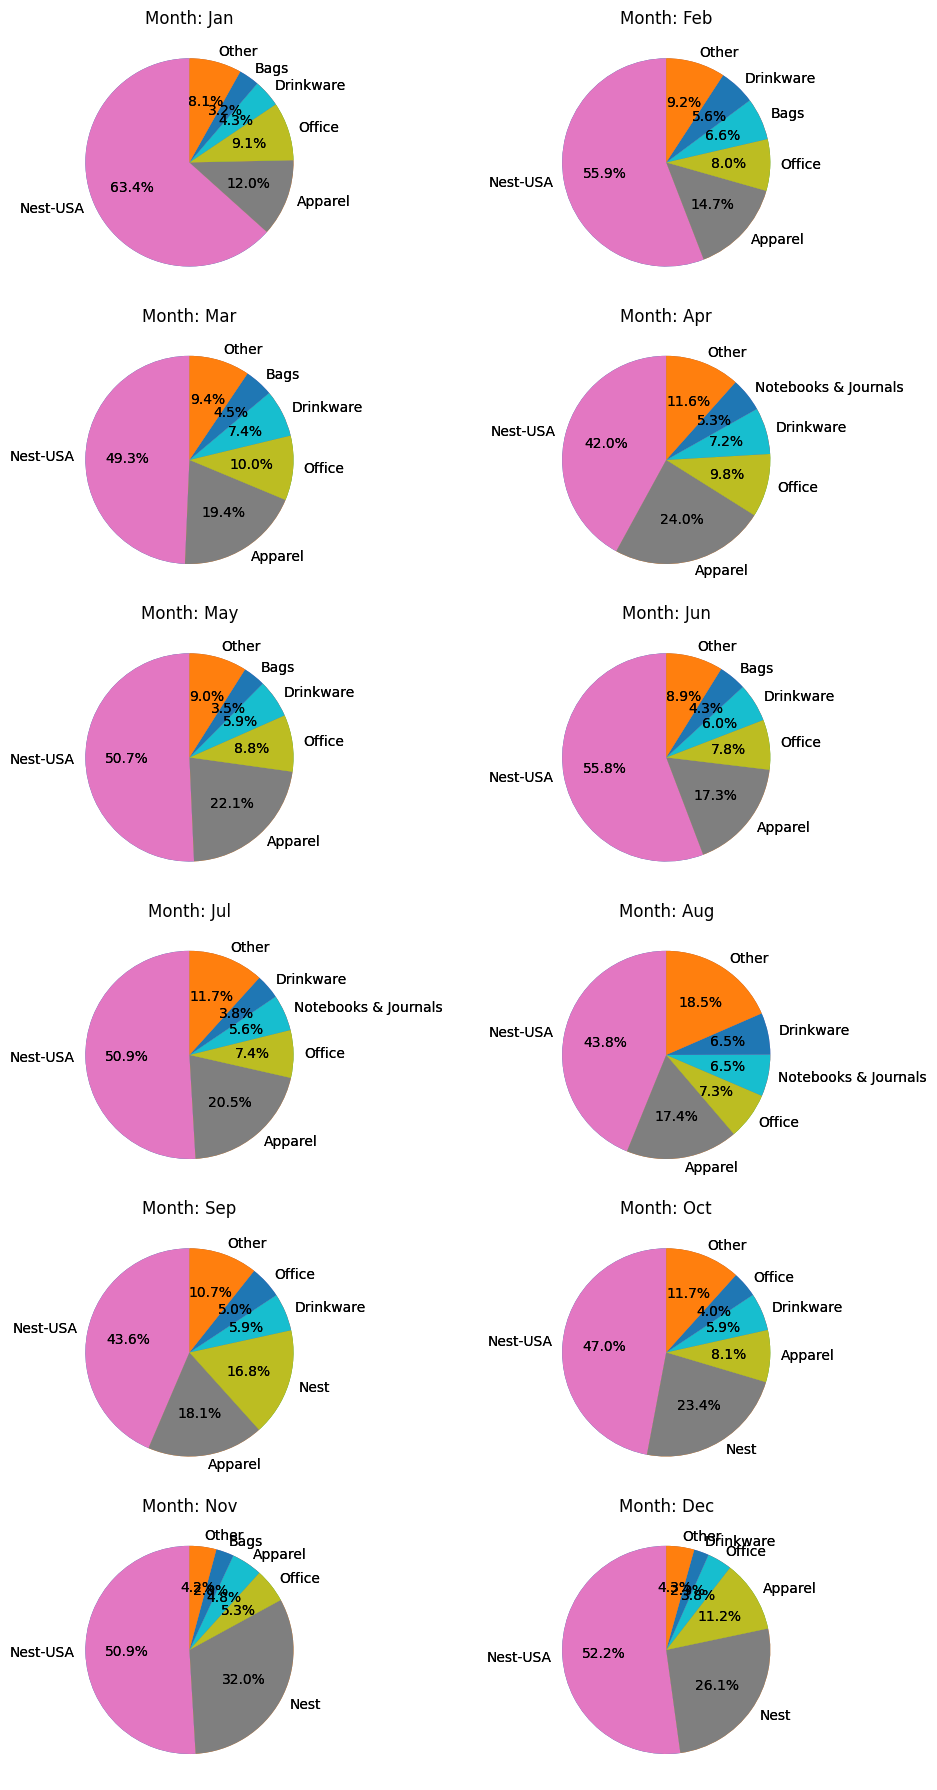

In [50]:
months = merged_df['Month'].unique()
categories = merged_df['Product_Category'].unique()

# Create a grid of pie charts
num_rows = int(len(months)/2)
num_cols = 2  # Adjust as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
categories_to_show = 5

for i, month in enumerate(months):
    month_data = merged_df[merged_df['Month'] == month]
    total_invoice = month_data.groupby('Product_Category')['Invoice'].sum() #getting total revenue by each product category
    total_invoice = total_invoice.sort_values(ascending=False)  # Sort the total_invoice

    if len(total_invoice) > categories_to_show: #creating other category to plot in pie chart
      other_sum = total_invoice.iloc[categories_to_show:].sum()
      total_invoice = total_invoice.iloc[:categories_to_show]
      total_invoice['Other'] = other_sum

    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] # Access the subplot using [i, 0]

    ax.pie(total_invoice, labels=total_invoice.index, autopct='%1.1f%%', startangle=90)

    ax.pie(total_invoice, labels=total_invoice.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Month: {month}')

plt.tight_layout()
plt.show()

We can see that Nest-USA has the highest share in the revenue across all the months followed by Apperal and nest

### Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month

In [51]:
mrkt_spend['Date'] = pd.to_datetime(mrkt_spend['Date'], format='%m/%d/%Y')
mrkt_spend['Month'] = mrkt_spend['Date'].dt.strftime('%b')
mrkt_spend['total_spend'] = mrkt_spend['Offline_Spend'] + mrkt_spend['Online_Spend']

x = mrkt_spend.groupby('Month')['total_spend'].sum().reset_index()
y = merged_df.groupby('Month')['Invoice'].sum().reset_index()
z = merged_df.groupby('Month')['Discount_pct'].mean().reset_index()
tax = merged_df.groupby('Month')['GST'].mean().reset_index()
deli_charg = merged_df.groupby('Month')['Delivery_Charges'].sum().reset_index()

result = x.merge(y, on='Month', how='inner')
result = result.merge(z, on='Month', how='inner')
result = result.merge(tax, on='Month', how='inner')
result = result.merge(deli_charg, on='Month', how='inner')

result['market_spend_%'] = (result['total_spend']*100)/result['Invoice']
result['Delivery_Charges_%'] = (result['Delivery_Charges']*100)/result['Invoice']

result

,Month,total_spend,Invoice,Discount_pct,GST,Delivery_Charges,market_spend_%,Delivery_Charges_%
0,Apr,157026.83,477498.59102,0.098747,0.142545,41481.74,32.885297,8.687301
1,Aug,142904.15,475796.87554,0.198764,0.148522,61099.57,30.034697,12.841524
2,Dec,198648.75,556112.29179,0.300000,0.121919,37881.99,35.720978,6.811932
3,Feb,137107.92,375162.04730,0.197625,0.136114,49216.60,36.546319,13.118758
4,Jan,154928.95,494090.54875,0.099016,0.131691,59242.32,31.356388,11.990175
5,Jul,120217.85,451878.40904,0.098953,0.144870,48723.93,26.604026,10.782531
6,Jun,134318.14,361000.17429,0.297567,0.143203,37513.58,37.207223,10.391568
7,Mar,122250.09,415157.79044,0.296134,0.141742,60799.94,29.446657,14.645020
8,May,118259.64,365596.02956,0.197550,0.144845,41396.17,32.347080,11.322927
9,Nov,161144.96,547788.12626,0.199798,0.116425,32311.93,29.417388,5.898618


### How marketing spend is impacting on revenue

In [52]:
correlation = result['total_spend'].corr(result['Invoice'])

print(f'Correlation between market_spend_% and Invoice: {correlation}')

Correlation between market_spend_% and Invoice: 0.79628352475623


## Performing Customer Segmentation

Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define a strategy on the same
Scientific (Using K-Means) & Understand the profiles. Define a strategy for each segment

In [53]:
merged_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice,Month2,Date,Week
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,0.1,0.10,158.6729,1900-01-01,2019-01-01,2019-00
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,0.1,0.10,158.6729,1900-01-01,2019-01-01,2019-00
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,0.1,0.10,8.5295,1900-01-01,2019-01-01,2019-00
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,0.1,0.18,109.9270,1900-01-01,2019-01-01,2019-00
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,0.1,0.18,24.0230,1900-01-01,2019-01-01,2019-00


In [54]:
merged_df['Date'].max()

datetime.date(2019, 12, 31)

In [55]:
today = pd.to_datetime('2020-01-01')  # taking the next date after the maximum date from the dataset
segment = merged_df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (today - x.max()).days,  # Calculate recency
    'Transaction_ID': 'count',  # Calculate frequency
    'Invoice': 'sum'  # Calculate monetary value
})

# Define thresholds for R, F, and M to segment customers
r_thresholds = [0, 100, 200, 300, float('inf')]  # Customize these as needed
f_thresholds = [0, 40, 70, 100, float('inf')]  # Customize these as needed
m_thresholds = [0, 4000, 7000,10000, float('inf')]  # Customize these as needed
# you can adjust this values by ploting sns.distplot(rfm['RFM_Segment'])

# Define segment labels
segment['R_Segment'] = pd.cut(segment['Transaction_Date'], bins=r_thresholds, labels=False) + 1
segment['F_Segment'] = pd.cut(segment['Transaction_ID'], bins=f_thresholds, labels=False) + 1
segment['M_Segment'] = pd.cut(segment['Invoice'], bins=m_thresholds, labels=False) + 1
# you can adjust thresold values by ploting sns.distplot(rfm['RFM_Segment'])

# Combine the three segments to get the final segment
segment['RFM_Segment'] = segment['R_Segment'] * 10 + segment['F_Segment'] * 10 + segment['M_Segment']*10


def h_segmentation(RFM_Segment):
  if RFM_Segment<=40:
    return 'Standard'
  elif (RFM_Segment>40) & (RFM_Segment<=70):
    return 'Silver'
  elif (RFM_Segment>70) & (RFM_Segment<=90):
    return 'Premium'
  else:
    return 'Gold'


segment['heuristic_segment'] = segment['RFM_Segment'].apply(h_segmentation)

In [56]:
segment.head()

,Transaction_Date,Transaction_ID,Invoice,R_Segment,F_Segment,M_Segment,RFM_Segment,heuristic_segment
CustomerID,,,,,,,,
12346,108,2,174.98174,2,1,1,40,Standard
12347,60,60,15686.84396,1,2,4,70,Silver
12348,74,23,1689.55594,1,1,1,30,Standard
12350,18,17,1467.43528,1,1,1,30,Standard
12356,108,36,2007.42900,2,1,1,40,Standard


In [57]:
segment['heuristic_segment'].value_counts()

,count
heuristic_segment,
Standard,697
Silver,611
Premium,129
Gold,31


In [58]:
# Merge the segment information back into the original dataset
df = merged_df.merge(segment[['heuristic_segment']], on='CustomerID', how='left')

## Perform cohort analysis by defining below cohorts

Customers who started in each month and understand their behavior.

Which Month cohort has maximum retention?

In [59]:
cohorts = df.groupby('Month')

# Calculate metrics for each cohort
cohort_metrics = cohorts.agg({
    'CustomerID': 'nunique',  # Count unique customers
    'Invoice': ['count','sum']  # Count total invoices
})

# # Rename columns for clarity
cohort_metrics.columns = cohort_metrics.columns.to_flat_index()
cohort_metrics.columns = ['Unique Customers', 'Total Invoices', 'Total Invoices Amount']

# Calculate cohort retention rates
cohort_size = cohort_metrics.iloc[:, 0] #extracts the 'Unique Customers' column, which represents the size of each cohort.
retention = cohort_metrics.divide(cohort_size, axis=0) #calculates retention rates by dividing each column in cohort_metrics by the cohort size (number of unique customers).

# Find the month cohort with maximum retention
max_retention_month = cohort_metrics['Unique Customers'].idxmax()

# Display the cohort analysis results
print("Cohort Metrics:")
print(cohort_metrics)
print("\nCohort Retention Rates:")
print(retention)
print("\nMonth cohort with maximum retention:", max_retention_month)

Cohort Metrics:
       Unique Customers  Total Invoices  Total Invoices Amount
Month                                                         
Apr                 224            4150           477498.59102
Aug                 300            6150           475796.87554
Dec                 236            4502           556112.29179
Feb                 109            3284           375162.04730
Jan                 215            4063           494090.54875
Jul                 236            5251           451878.40904
Jun                 259            4193           361000.17429
Mar                 208            4346           415157.79044
May                 200            4572           365596.02956
Nov                 188            3961           547788.12626
Oct                 210            4164           480767.36981
Sep                 193            4288           396510.49254

Cohort Retention Rates:
       Unique Customers  Total Invoices  Total Invoices Amount
Month         

We can see that Maximum retention is in the month of August

# Insights and recommendation

**Insights:**

1. **Customer Acquisition:**
- Customer acquisition peaks in August (around 300 new customers), indicating a strong seasonal influence or the success of marketing campaigns during that period.
- February experiences the lowest customer acquisition, suggesting a need for targeted strategies to attract customers during this slower month.

2. **Customer Retention:**
- Customer retention is highest in July and August, with retention counts exceeding during these months. This highlights the effectiveness of customer engagement and retention strategies implemented during this period.
- Retention dips in other months, suggesting a need for improved customer relationship management throughout the year.

3. **Revenue Sources:**
- While new customers contribute significantly to revenue initially, existing customers become the dominant revenue source after June.
- New customer revenue peaks in March, with revenue exceeding. Existing customer revenue reaches its highest point in August, with revenue exceeding. This emphasizes the importance of balancing acquisition and retention efforts.

4. **Impact of Discounts:**
- Coupons with a "Clicked" status drive almost 50% of the total revenue.
- Revenue from transactions where coupons were used is significantly higher than from transactions without coupons. This highlights the importance of discount strategies in attracting and retaining customers.

5. **Product Performance:**
- Nest-USA products are the top revenue generators and among the most purchased products by quantity. This indicates their popularity and potential for driving sales.

6. **Marketing ROI:**
- A positive correlation exists between marketing spend and revenue, suggesting that marketing efforts are contributing to sales growth.
- The correlation coefficient is [refer to notebook output]. This highlights the importance of continued investment in marketing and the need for ongoing evaluation of marketing effectiveness.

7. **Customer Segmentation:**
- Heuristic segmentation using RFM values reveals a significant portion of customers falling under the Standard segment, followed by Silver, Premium, and Gold.
- This segmentation enables targeted marketing strategies for different customer groups.

8. **Cohort Analysis:**
- The August cohort exhibits the highest retention rate, indicating the long-term value of customers acquired during this period.
- Other cohorts have lower retention rates, suggesting a need for improved customer engagement strategies to increase customer lifetime value.

**Recommendations:**

- **Targeted Marketing:** Leverage customer segmentation insights to develop personalized marketing campaigns for each segment, focusing on their unique needs and preferences.
- **Seasonal Promotions:** Implement targeted promotions during peak months like August to capitalize on customer acquisition opportunities. Focus on strategies to boost sales during slower months like February.
- **Optimize Discounts:** Refine coupon and discount strategies based on their effectiveness in driving revenue. Experiment with different types of discounts and target segments with tailored offers.
- **Product Focus:** Prioritize marketing efforts for high-performing products like Nest-USA to maximize revenue. Explore opportunities to expand product offerings based on customer preferences.
- **Customer Retention:** Implement strategies to enhance customer loyalty and retention, particularly for cohorts with lower retention rates. Focus on personalized communication and loyalty programs.
- **Marketing Spend Optimization:** Continuously monitor marketing ROI and adjust spending to optimize returns. Explore new marketing channels and evaluate their effectiveness.
- **Cohort Analysis:** Deep dive into the behavior of different customer cohorts to identify patterns and tailor marketing strategies for specific groups.
- **Product Recommendations:** Implement a product recommendation system based on customer purchase history to increase sales and customer engagement.
- **Customer Feedback:** Collect customer feedback to identify areas for improvement and enhance customer experience. Implement changes based on customer feedback to improve overall satisfaction.